# Limitation of Linear Regression

The goal of this notebook is to highlight the limitations of Linear Regression.  
The Linear Regression model is only able to identify linear relationships.  
We use this famous collection of datasets to show OLS can return the same results from very different data.

__[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe's_quartet)__

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline

In [2]:
# Anscombe dataset includes 4 different data sets
anscombe = sns.load_dataset("anscombe")

In [3]:
# Get the descriptive statistics for each dataset
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [4]:
# Defining function using linregress of stats module for builing a linear regression model for each of the datasets
# Returns summary statistics
def get_summarystats(dataset):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=anscombe[anscombe.dataset==dataset].x,
                                                               y=anscombe[anscombe.dataset==dataset].y)
    
    
    return slope, intercept, r_value, p_value, std_err

In [5]:
# Getting summary statistics for each dataset
results = []
for dataset in 'I II III IV'.split():
    slope, intercept, r_value, p_value, std_err = get_summarystats(dataset)
    results.append([slope, intercept, r_value])

print('[slope, intercept, r_value] for each dataset')
results

[slope, intercept, r_value] for each dataset


[[0.5000909090909091, 3.0000909090909103, 0.8164205163448399],
 [0.5000000000000001, 3.000909090909089, 0.816236506000243],
 [0.4997272727272729, 3.002454545454544, 0.8162867394895984],
 [0.4999090909090909, 3.0017272727272726, 0.8165214368885028]]

Even the descriptive statistics and the linear regression parameters are nearly the same, the datasets look destinctivly different.
Let's have a look at the data and the linear regression lines.

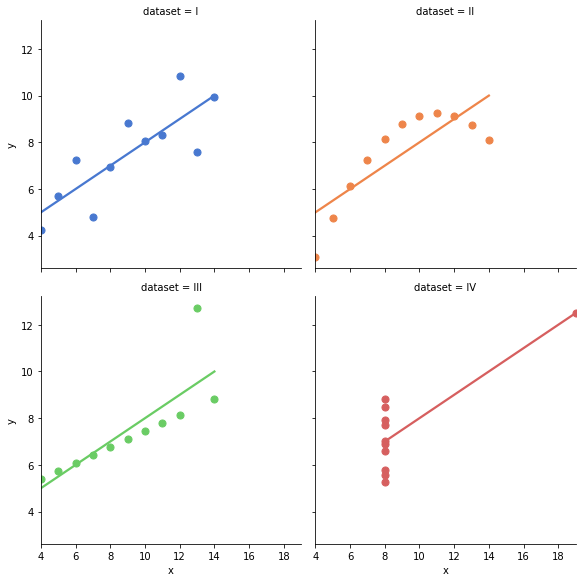

In [6]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1});

We can see from the above that the lines which have been fitted as well as the summary statistics are all the same - although we have completely different data.  

In this cases, it is purposefully obvious that the model has problems fitting lines to datasets II, III and IV.  
In normal cases it is necessary to look at the plot of the residuals to catch these errors.

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Defining funtion which calculates residuals and plots them
def get_residuals(dataset):
    obs_values = anscombe[anscombe.dataset==dataset].y 
    pred_values = get_summarystats(dataset)[0] * anscombe[anscombe.dataset==dataset].x + get_summarystats(dataset)[1] 
    residuals = obs_values - pred_values
    #Plot residuals
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(anscombe[anscombe.dataset==dataset].x, residuals, alpha=0.5)
    ax.set_ylabel("Residuals")
    ax.set_xlabel("x")
    fig.suptitle('Residual Scatter Plot')
    plt.show()

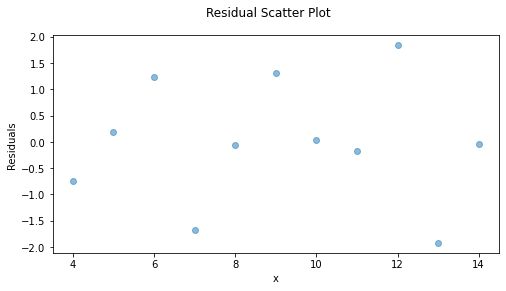

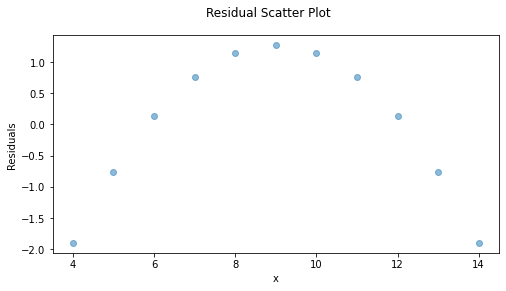

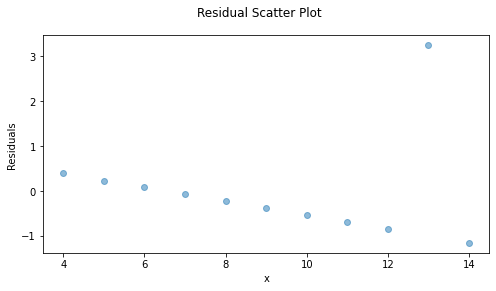

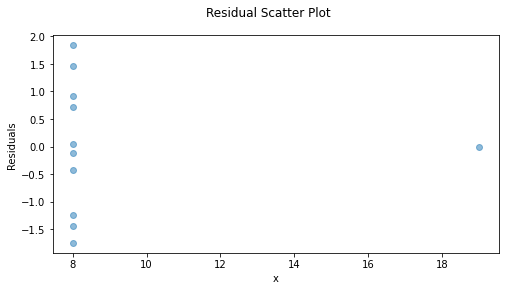

In [9]:
# Use defined function to plot residuals for all datasets
for dataset in 'I II III IV'.split():
    get_residuals(dataset) 

## Summary
In a well-fitted model, the residuals will be randomly distributed - whereas in rather badly fitted models, you will find patterns in your residual-distribution.  
These tell you that there are additional explanatory factors missing from your model.  
[Further reading on residuals](https://www.statology.org/residuals/) as well as [here](https://towardsdatascience.com/how-to-use-residual-plots-for-regression-model-validation-c3c70e8ab378).